In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import mchmm as mc
from marc import MarkovChain

In [75]:
t = 1/50

# Importing data

In [76]:
with open('/Users/gaspardandre/Documents/challenge-deliverable-20-11-23/data/match_1.json') as mon_fichier:
    match_1 = json.load(mon_fichier)
with open('/Users/gaspardandre/Documents/challenge-deliverable-20-11-23/data/match_2.json') as mon_fichier:
    match_2 = json.load(mon_fichier)

# Data analysis

In [77]:
actions = [el["label"] for el in match_1]
norms = [el["norm"] for el in match_1]

actions_2 = [el["label"] for el in match_2]
norms_2 = [el["norm"] for el in match_2]

In [78]:
norms_shot = []
norms_cross = []
norms_pass = []
norms_rest = []
norms_walk = []
norms_run = []
norms_dribble = []
norms_tackle = []
for el in match_1:
    if el['label'] == 'shot':
        norms_shot.append(el['norm'])
    if el['label'] == 'cross':
        norms_cross.append(el['norm'])
    if el['label'] == 'pass':
        norms_pass.append(el['norm'])
    if el['label'] == 'rest':
        norms_rest.append(el['norm'])
    if el['label'] == 'walk':
        norms_walk.append(el['norm'])
    if el['label'] == 'run':
        norms_run.append(el['norm'])
    if el['label'] == 'dribble':
        norms_dribble.append(el['norm'])
    if el['label'] == 'tackle':
        norms_tackle.append(el['norm'])

## 1) Label analysis

Let's compare the proportion of each type of action for the 2 matchs using pies charts, and then analyze the way actions follow each other over the course of the matchss using action transition matrices.

### Proportion action pie chart

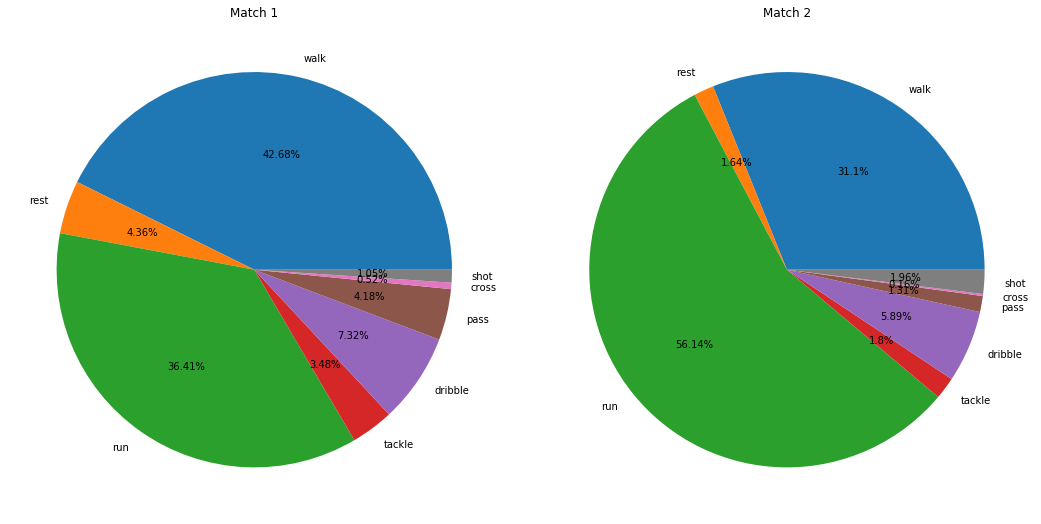

In [79]:
class_actions = ['walk','rest','run','tackle','dribble','pass','cross','shot']
count = [actions.count(el) for el in class_actions]
count_2 = [actions_2.count(el) for el in class_actions]


figure = plt.figure(figsize = (35, 20))

axes = figure.add_subplot(2, 2, 1)
axes.pie(count, labels=class_actions,
           autopct = lambda x: str(round(x, 2)) + '%')
plt.title('Match 1')

axes = figure.add_subplot(2, 1, 1)
axes.pie(count_2, labels=class_actions,
           autopct = lambda x: str(round(x, 2)) + '%')
#axes.legend()

plt.title('Match 2')
plt.show()

For the 2 matches, the main actions are 'run' and 'walk', occupying approximately 80% of the time (79% for match 1 and 87% for match 2). This is consistent with the fact that in a soccer match, players are not close to the ball most of the time.

For the 2 matches, the "shot" and "cross" actions each occupy less than 2% of the time, which is also coherent since these are rather rare actions in the course of a match.

Furthermore, we can assume that match 1 corresponds to a more defensive or defensive midfield game, since there are fewer "shot(s)", more "pass(es)", more "tackle(s)", more running with the ball ("dribble"), and less running without the ball ("run") compared in proportion to match 2. But this would require a more detailed analysis to be confirmed, since the "run" label could correspond to a whole host of more precise actions: pressing, marking, calling the ball to shoot at goal, positioning on the pitch...

### Transition between the actions


### Transition matrices
To analyze the transition between action types during matches, we look at the transition matrices of the 2 matches, where at position $(action_i,action_j)$ is the probability of moving from $action_i$ to $action_j$, calculated from the temporal succession of actions provided in the data.

In [80]:
m_chaine = mc.MarkovChain().from_data(actions)
m_chaine_2 = mc.MarkovChain().from_data(actions_2)


print('                              Match 1')
print(pd.DataFrame(np.round(m_chaine.observed_p_matrix, 2), index=m_chaine.states, columns=m_chaine.states))
print('')
print('')
print('                              Match 2')
print(pd.DataFrame(np.round(m_chaine_2.observed_p_matrix, 2), index=m_chaine_2.states, columns=m_chaine_2.states))

                              Match 1
         cross  dribble  pass  rest   run  shot  tackle  walk
cross     0.00     0.00  0.33  0.33  0.00  0.00    0.00  0.33
dribble   0.05     0.45  0.26  0.00  0.14  0.05    0.00  0.05
pass      0.04     0.08  0.21  0.08  0.21  0.00    0.00  0.38
rest      0.00     0.00  0.04  0.00  0.20  0.00    0.00  0.76
run       0.00     0.07  0.02  0.02  0.72  0.01    0.06  0.11
shot      0.00     0.00  0.00  0.00  0.33  0.33    0.00  0.33
tackle    0.00     0.10  0.00  0.00  0.40  0.00    0.30  0.20
walk      0.00     0.02  0.01  0.07  0.14  0.00    0.01  0.75


                              Match 2
           cross  dribble  no action  pass  rest   run  shot  tackle  walk
cross       0.00     0.00       0.00  0.00  0.00  1.00  0.00    0.00  0.00
dribble     0.03     0.56       0.00  0.19  0.00  0.06  0.14    0.00  0.03
no action   0.00     0.00       0.00  0.00  0.00  0.50  0.00    0.00  0.50
pass        0.00     0.25       0.00  0.00  0.12  0.50  0.00    

The 0.00 in the matrices indicate actions that have little or no chance of occurring as a result. For example ("pass", "shot"). There are significant differences between the matrices of the 2 matches. For example the transition probability (dribble, pass) is slightly higher for match 1 while the transition probability (dribble, shot) is slightly higher for match 2. This therefore tends to confirm our hypothesis according to which the data from match 2 indicates an at least slightly more offensive profile

## 2) Analysis of the acceleration norms

In this section we will use the data from match 1.

Let's analyze the time series of acceleration norms on the gaits to determine whether it's possible to distinguish between different action labels. Let's start by looking at the average durations of the gaits for each type of action. Then let's look at different time graphs of acceleration on a gait. Finally, let's analyse the averages of these accelerations.

### Duration of the actions

In [81]:
durations_shot = [(len(el)-1)*t for el in norms_shot]
durations_cross = [(len(el)-1)*t for el in norms_cross]
durations_pass = [(len(el)-1)*t for el in norms_pass]
durations_rest = [(len(el)-1)*t for el in norms_rest]
durations_walk = [(len(el)-1)*t for el in norms_walk]
durations_run = [(len(el)-1)*t for el in norms_run]
durations_dribble = [(len(el)-1)*t for el in norms_dribble]
durations_tackle = [(len(el)-1)*t for el in norms_tackle]

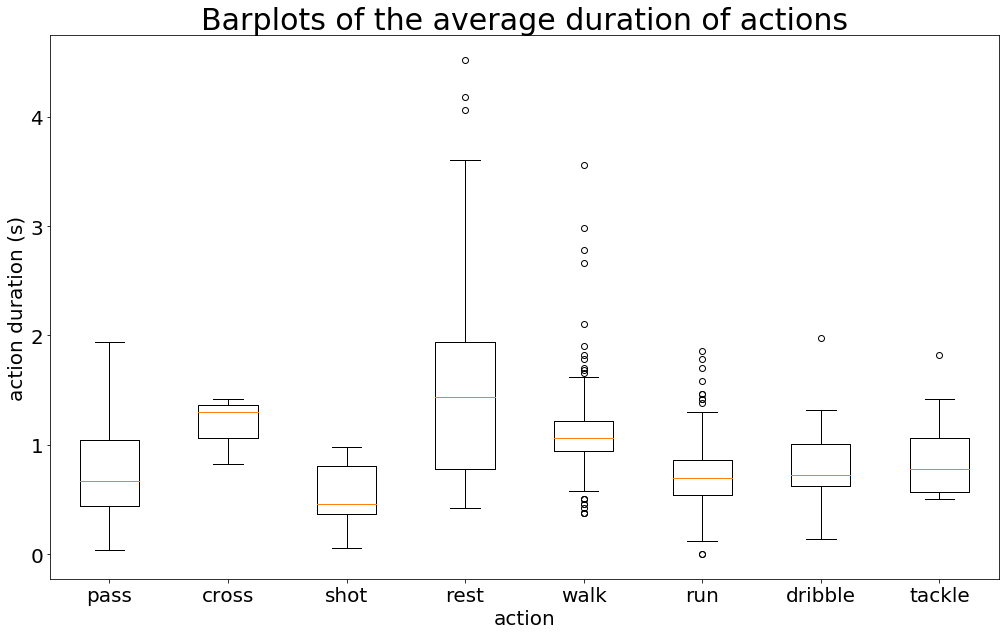

In [82]:
plt.figure(figsize = (17, 10))
durations = np.array([durations_pass,durations_cross,durations_shot, durations_rest,
durations_walk,durations_run,durations_dribble, durations_tackle], dtype='object')
class_actions = ['pass', "cross", "shot", "rest", "walk", "run", "dribble", "tackle"]

plt.title('Barplots of the average duration of actions', size=30)
plt.gca().xaxis.set_ticklabels(class_actions, size=20)
plt.gca().yaxis.set_ticklabels([-1, 0, 1 ,2, 3, 4], size=20)
plt.boxplot(durations)
plt.xlabel('action', size=20)
plt.ylabel('action duration (s)', size=20)
plt.show()

The gaits vary in length from a tenth of a second to 3 or 4 seconds. Most actions last from several tenths of a second to just over a second. But there are significant statistical fluctuations between the gaits corresponding to a label and the different labels. This could pose some problems in the context of a comparison between gaits or for the end goal of recreating data to simulate a match.

### Acceleration graphs

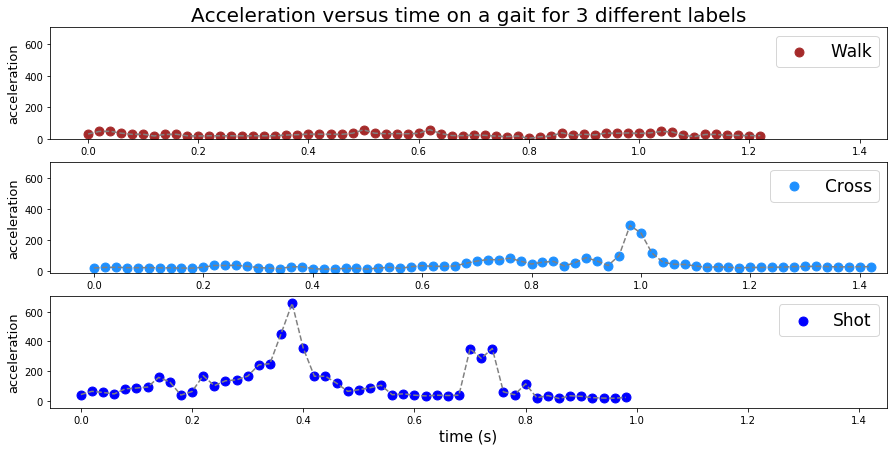

In [83]:
times_1 = [t*i for i in range(len(norms_walk[46]))]       #11
acc_1 = norms_walk[46]
times_2 = [t*i for i in range(len(norms_cross[1]))]       #1
acc_2 = norms_cross[1]
times_3 = [t*i for i in range(len(norms_shot[5]))]         #5
acc_3 = norms_shot[5]

times = [times_1, times_2, times_3]
acc = [acc_1, acc_2, acc_3]
title = ['Walk plot', 'Cross plot', 'Shot plot']
col = ["brown", "dodgerblue", "blue"]
leg = ['Walk', 'Cross', 'Shot']

max_x = max([max(el) for el in times])
max_y = max([max(el) for el in acc])

fig, axs = plt.subplots(3, 1,figsize=(15,7))

axs[0].set_title('Acceleration versus time on a gait for 3 different labels', size=20)
for i in range(3):
    axs[i].set_ylabel('acceleration', size=13)
    axs[i].plot(times[i], acc[i], "--", c='gray')
    axs[i].scatter(times[i], acc[i], s=80, c=col[i], label=leg[i])
    axs[i].legend(fontsize=17)
    axs[i].set_xlim(right=max_x+0.03)
    axs[i].set_ylim(top=max_y+50)

axs[2].set_xlabel('time (s)', size=15)
plt.show()

For these 3 graphs it is possible to make a visual distinction between the types of actions. The acceleration of "walk" fluctuates slightly below 100 units. That of "cross" contains a clear and brief peak temporally up to 300 ordinate units. Finally, that of "shot" contains 2 brief peaks up to 600 and 400 units.

A possible interpretation is to say that during a shot or a hard pass there is a brief peak of acceleration corresponding to the movement of the leg striking the ball and which does not exist for a classic race.

### Study of average accelerations

In this part, we do not represent the "shot" and "cross" labels which are not present with sufficient gaits to make an interesting statistical study and not to add unnecessary confusion to the graphs.

In [84]:
means_run = [np.mean(el) for el in norms_run]
means_walk = [np.mean(el) for el in norms_walk]
means_dribble = [np.mean(el) for el in norms_dribble]
means_tackle = [np.mean(el) for el in norms_tackle]
means_pass = [np.mean(el) for el in norms_pass]
means_rest = [np.mean(el) for el in norms_rest]

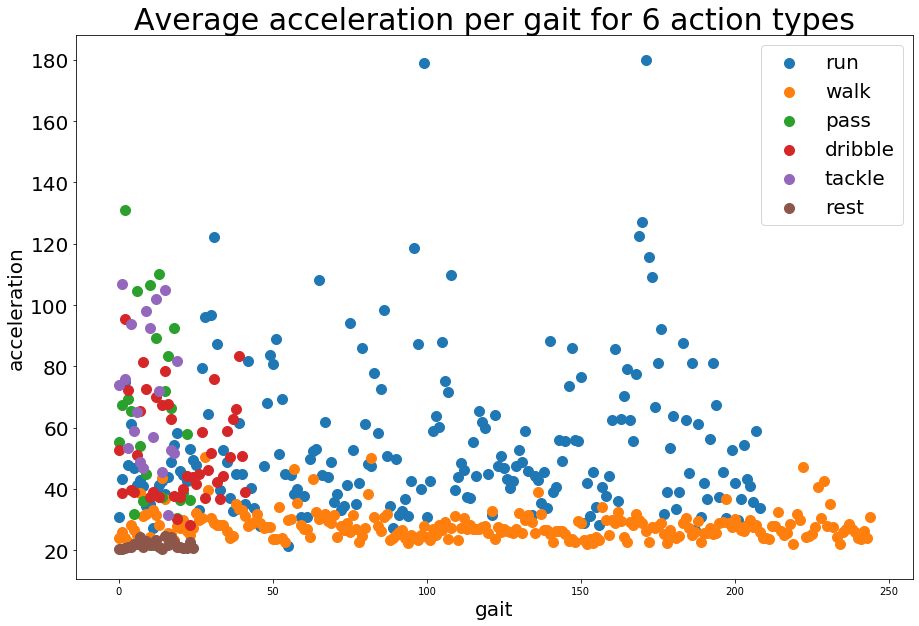

In [85]:
plt.figure(figsize = (15,10))
plt.scatter([i for i in range(len(norms_run))],[np.mean(el) for el in norms_run], s=100, label='run')
plt.scatter([i for i in range(len(norms_walk))],[np.mean(el) for el in norms_walk], s=100, label='walk')
plt.scatter([i for i in range(len(norms_pass))],[np.mean(el) for el in norms_pass], s=100, label='pass')
plt.scatter([i for i in range(len(norms_dribble))],[np.mean(el) for el in norms_dribble], s=100, label='dribble')
plt.scatter([i for i in range(len(norms_tackle))],[np.mean(el) for el in norms_tackle], s=100, label='tackle')
plt.scatter([i for i in range(len(norms_rest))],[np.mean(el) for el in norms_rest], s=100, label='rest')


plt.xlabel('gait', size=20)
plt.ylabel('acceleration', size=20)
plt.title('Average acceleration per gait for 6 action types', size=30)
plt.gca().yaxis.set_ticklabels([0, 20, 40, 60 ,80, 100, 120, 140, 160, 180], size=20)
plt.legend(fontsize=20)
plt.show()

It is possible to distinguish between 3 categories of average point: the points corresponding to “rest” with low averages concentrated around 20 units, the points corresponding to walk with a greater dispersion in accelerations and concentrated between 20 and 40 units, and finally all other types of point with a much greater dispersion between 30 and more than 100 units. For the labels "run", pass, "dribble", "tackle" it is therefore difficult to establish a distinction. Probably because on the one hand only the label "run" is present in relatively large quantities and on the other hand because these actions are probably very similar in terms of average acceleration of the leg

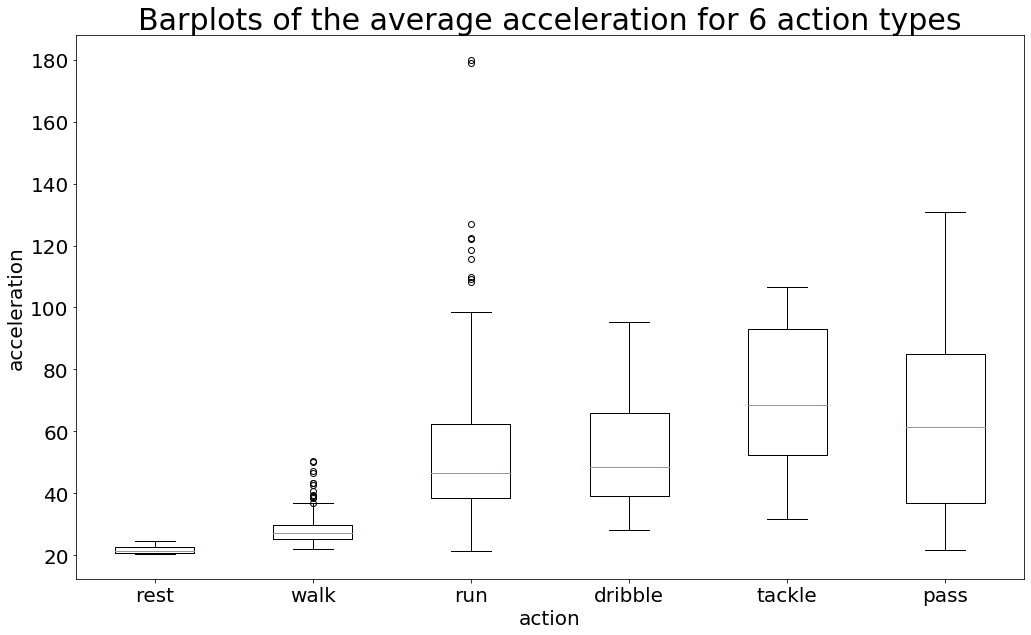

In [86]:
plt.figure(figsize = (17, 10))
means = np.array([means_rest, means_walk, means_run, means_dribble, means_tackle, means_pass], dtype='object')
class_actions = ['rest', 'walk', 'run', 'dribble', 'tackle', 'pass']

plt.gca().xaxis.set_ticklabels(class_actions, size=20)
plt.gca().yaxis.set_ticklabels([0, 20, 40, 60 ,80, 100, 120, 140, 160, 180], size=20)
plt.boxplot(means)
plt.title('Barplots of the average acceleration for 6 action types', size=30)
plt.xlabel('action', size=20)
plt.ylabel('acceleration', size=20)
plt.show()

The barplots confirm the analysis made previously and make a clear statistical distinction between the categories: "rest, "run" and other types of actions

## 3) Conclusion

To generate a coherent action sequence that resembles the action sequences of the training data, it is possible to use an Natural language processing (NLP) algorithm which predicts the next word (for example using Recurrent neural network (RNN)). But as there are only 9 actions the modeling of this sequence by a Markov chain is sufficient

To recreate new gaits for each action it would theoretically be possible to use a Generative adversarial network (GAN) model. But this would require a large amount of training gait for each action, which we do not have. We will therefore use a much simpler approach which consists of randomly selecting gaits and disturbing them with Gaussian noise. It would also be possible to use an approach consisting of sliding the acceleration peak which is an approach comparable to that used in computer vision when we do data augmentation by applying rotations or translation of the picture.

# Generation of football games

To recreate the football games we will simulate a Markov chain from the transition matrix of the training data labels to recreate a coherent sequence of actions. Then for a given gait, in order to recreate a time series for the corresponding gait we will randomly select among the actions of the same label and we will return the accelerations by adding Gaussian noise.

## 1) Markov chain

We start the match with the "walk" action then we model the sequence of actions until the end of the match by a Markov chain of transition matrix resulting from the succession of actions of a training match.

Thus, for $n>1$, if we consider that $action_i$ was drawn randomly then $action_j$ is drawn at step $n+1$ with a probability $p_{ij}$ (where $p_{ij}$ is in position $ij$ in the transition matrix.

The process stops when the time corresponding to the sum of the times of the actions spent reaches the total time desired for the match.

As we simulate the Markov chain using a succession of actions resulting from a coherent match, the new match generated will also have a succession of coherent actions.

In [87]:
m_chaine = mc.MarkovChain().from_data(actions)

print('                Transition matrix for match 1')
print('')
print(pd.DataFrame(np.round(m_chaine.observed_p_matrix, 2), index=m_chaine.states, columns=m_chaine.states))

                Transition matrix for match 1

         cross  dribble  pass  rest   run  shot  tackle  walk
cross     0.00     0.00  0.33  0.33  0.00  0.00    0.00  0.33
dribble   0.05     0.45  0.26  0.00  0.14  0.05    0.00  0.05
pass      0.04     0.08  0.21  0.08  0.21  0.00    0.00  0.38
rest      0.00     0.00  0.04  0.00  0.20  0.00    0.00  0.76
run       0.00     0.07  0.02  0.02  0.72  0.01    0.06  0.11
shot      0.00     0.00  0.00  0.00  0.33  0.33    0.00  0.33
tackle    0.00     0.10  0.00  0.00  0.40  0.00    0.30  0.20
walk      0.00     0.02  0.01  0.07  0.14  0.00    0.01  0.75


## 2) Generation of accelerations

Let $a_{train}$ the acceleration time series selected randomly among the accelerations of the corresponding label. The predicted acceleration will be such that $a_{train}=a_{predict}+noise$ with $noise$ following a normal law $\mathcal{N}(0,\alpha min(a_{train}))$ and $\alpha$ a parameter to be determined depending on the type of action considered and $min(a_{train})$ the minimum acceleration value on the time series of the training data.

The idea is to slightly disturb the initial data to have new data but not to disturb it too much so that it remains coherent and attachable to the correct label.

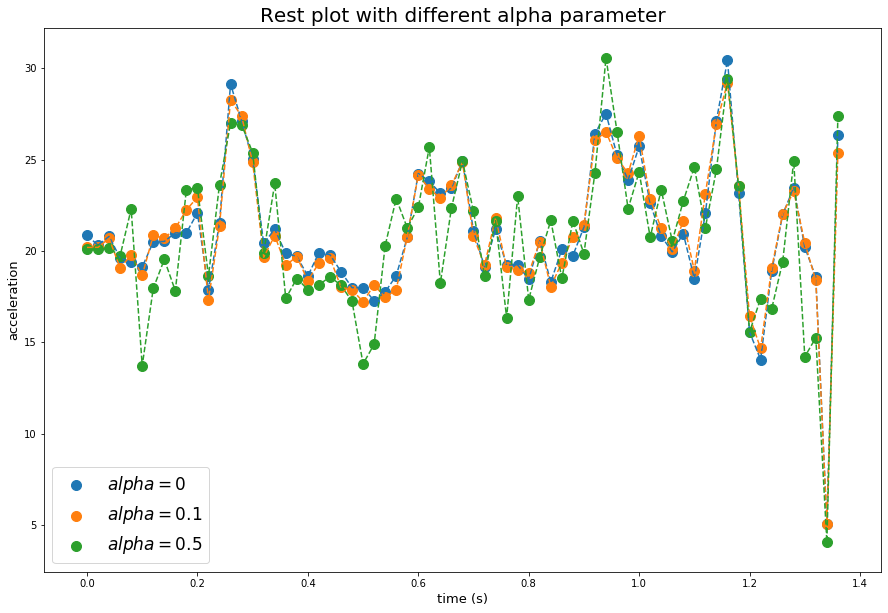

In [88]:
times_1 = [t*i for i in range(len(norms_rest[8]))]       
acc_1 = norms_rest[8]

times = [times_1, times_1]
acc = [acc_1, acc_1]

alpha_1 = 1/10
noise_1 = np.random.normal(0,alpha_1*np.min(acc_1),len(acc_1))
acc_pred_1 = acc_1 + noise_1

alpha_2 = 1/2
noise_2 = np.random.normal(0,alpha_2*np.min(acc_1),len(acc_1))
acc_pred_2 = acc_1 + noise_2

acc_pred = [acc_pred_1, acc_pred_2]

plt.figure(figsize = (15, 10))
plt.ylabel('acceleration', size=13)
plt.plot(times[0], acc[0], "--")
plt.scatter(times[0], acc[0], s=100, label='$alpha=0$')
plt.plot(times[0], acc_pred[0], "--")
plt.scatter(times[0], acc_pred[0], s=100, label='$alpha=0.1$')
plt.plot(times[1], acc_pred[1], "--")
plt.scatter(times[1], acc_pred[1], s=100, label='$alpha=0.5$')
plt.legend(fontsize=17, loc='lower left')
plt.title('Rest plot with different alpha parameter', size=20)
plt.xlabel('time (s)', size=13)

plt.show()

Let's observe a gait of the label "rest" with the initial data in blue, the disturbed data with $alpha=0.1$ in orange and the disturbed data with $alpha=0.5$ in green. We notice that if we disturb the original data too much with $alpha=0.5$ then the acceleration created loses consistency compared to the initial one.

To create the match generating function we will therefore take relatively low alpha coefficients to be sure not to confuse the data too much. We will take $alpha=0.05$ for the 'rest' and 'walk' labels (which have lower norms standards) and $alpha=0.1$ for all other labels.

## 3) Creation of the match generating function

In [89]:
def generate_match(match_train, duration):
    '''Generate a new football game.

        Parameters
        ----------
        match_train : list, 
            List of dictionaries where each dictionary
            include two keys: norm and label.

        duration : int, 
           Total duration (in seconds) that the user want.

        Returns
        -------
        gen_match : list
            The generated game in the same format as match_train.
        '''
    
    actions_chain = [el["label"] for el in match_train]
    markov = MarkovChain(actions_chain)
    predict_chain = ['walk']
    
    actions_categories = ['shot', 'cross', 'pass', 'rest', 'walk', 'run', 'dribble','tackle']
    
    if 'no action' in actions_chain:
        actions_categories.append('no action')
    
    actions_norms = {el:[] for el in actions_categories}
    for action in match_train:
        for category in actions_categories:
            if action['label'] == category:
                actions_norms[category].append(action['norm'])
                
    alphas = {'shot':0.1, 'cross':0.1, 'pass':0.1, 'rest':0.05, 'walk':0.05, 'run':0.1, 'dribble':0.1,'tackle':0.1}
    
    if 'no action' in actions_chain:
        alphas['no action'] = 0.1
    
    time_spent = 0
    
    predict_match = []
    
    norms_train = actions_norms["walk"]
    ind = np.random.randint(len(norms_train))
    while (t*(len(norms_train[ind])-1)<= 0.1) or (t*(len(norms_train[ind])-1) >= 3):
        ind = np.random.randint(len(norms_train))
    noise = np.random.normal(0, alphas["walk"]*np.min(norms_train[ind]), len(norms_train[ind]))
    predict_norm = norms_train[ind] + noise

    predict_match.append({'label':"walk", 'norm': list(predict_norm)})

    time_spent += t * (len(norms_train[ind])-1)
    
    while time_spent < duration:
        
        predict_action = markov.next(predict_chain[-1])
        predict_chain.append(predict_action)
        
        
        norms_train = actions_norms[predict_action]
        ind = np.random.randint(len(norms_train))
        while (t*(len(norms_train[ind])-1)<= 0.1) or (t*(len(norms_train[ind])-1) >= 3):
            ind = np.random.randint(len(norms_train))
        noise = np.random.normal(0, alphas[predict_action]*np.min(norms_train[ind]), len(norms_train[ind]))
        predict_norm = norms_train[ind] + noise
        
        predict_match.append({'label':predict_action, 'norm': list(predict_norm)})
        
        time_spent += t * (len(norms_train[ind])-1)
    
    return predict_match



## 4) Creation of new game with the function

### Some games generation

In [95]:
gen_match = generate_match(match_1, 100)      #15 minutes
gen_match_2 = generate_match(match_1, 1800)   #30 minutes
gen_match_3 = generate_match(match_1, 3600)   #60 minutes

gen_match_4 = generate_match(match_2, 900)

###  Time consistency check

In [96]:
norms_gen = [el["norm"] for el in gen_match_3]
durations = [(len(el)-1)*t for el in norms_gen]
print('maximum duration of a gait:',max(durations),'s')
print('minimum duration of a gait:',min(durations),'s')
print('Number of gaits in the game:',len(gen_match_3))

maximum duration of a gait: 2.98 s
minimum duration of a gait: 0.12 s
Number of gaits in the game: 3879


### Consistency of the succession of actions

In [97]:
actions_gen = [el["label"] for el in gen_match_3]
m_chaine = mc.MarkovChain().from_data(actions_gen)
pd.DataFrame(np.round(m_chaine.observed_p_matrix,2), index=m_chaine.states, columns=m_chaine.states)

,cross,dribble,pass,rest,run,shot,tackle,walk
cross,0.00,0.00,0.22,0.33,0.00,0.00,0.00,0.44
dribble,0.04,0.47,0.25,0.00,0.18,0.04,0.00,0.04
pass,0.04,0.10,0.21,0.06,0.22,0.00,0.00,0.36
rest,0.00,0.00,0.02,0.00,0.21,0.00,0.00,0.78
run,0.00,0.07,0.02,0.02,0.70,0.01,0.06,0.11
shot,0.00,0.00,0.00,0.00,0.38,0.32,0.00,0.30
tackle,0.00,0.13,0.00,0.00,0.42,0.00,0.27,0.18
walk,0.00,0.02,0.01,0.07,0.14,0.00,0.01,0.75


The transition matrix of the actions of the match generated is close to the transition matrix of match 1 and therefore the succession of actions makes sense.